Antes de realizar a integração, necessário ter os seguintes passos:<br>

Na internet, procurar por "Google Developer Console"<br>
https://console.cloud.google.com/cloud-resource-manager <br>

Criar novo projeto

No GCP, acessar o projeto criado.<br>
Ir em Google Drive Api<br>
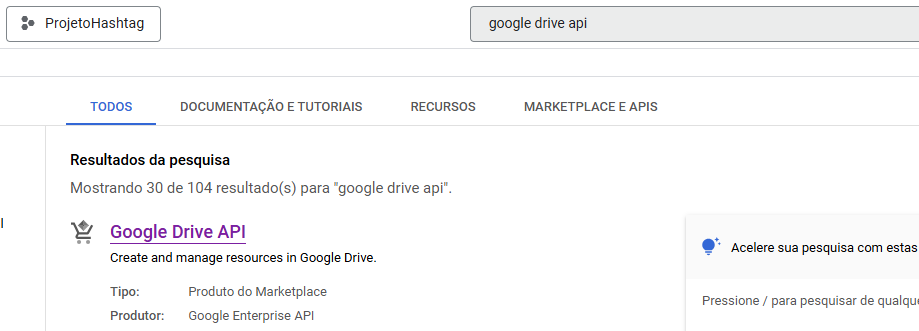<br>

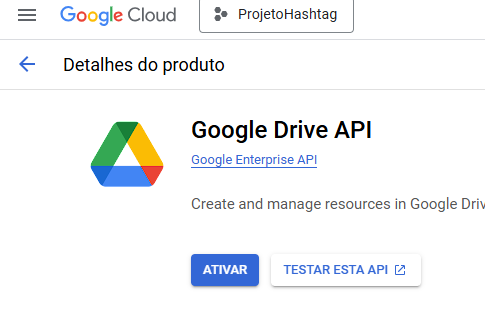<br>
Ativar

Fazer o mesmo para o google sheets<br>
Google Sheets Api


Ir em menu de navegação, apis e serviços - api e serviços ativados<br>
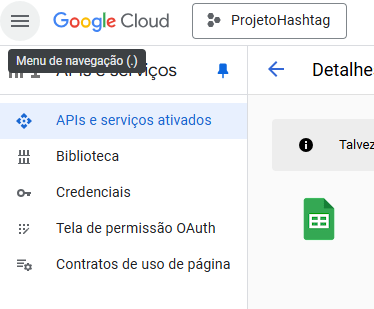<br>
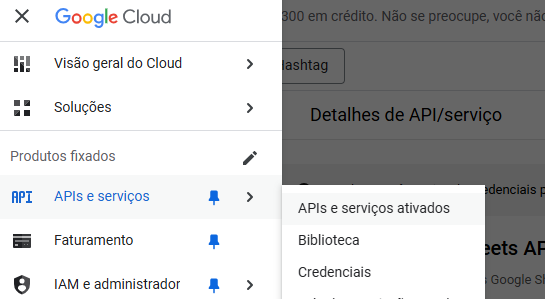<br>

Ir em tela de permissão OAuth<br>
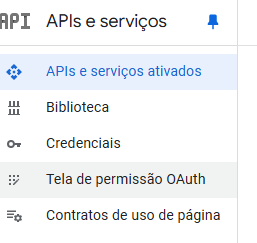

Em visão geral, preencher os dados conforme necessário<br>
Recomendado - utilizar interno por questões de proteção.<br>
Neste momento, iremos utilizar externo, somente para facilitar testes<br>
Após isso, será direcionado para criar a tela de OAuth.<br>
Caso nao seja, redirecionado, ir para a aba Clientes, + Create Client<br>
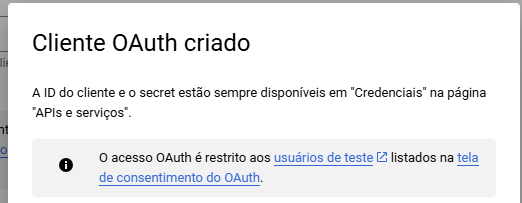

É possível baixar o json gerado, afim de utilizá-lo no código

No Google, procurar por Google Sheets API Python

In [ ]:
# Instalar as bibliotecas necessárias no python:
# !pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

from __future__ import print_function

import os.path

from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials
from google_auth_oauthlib.flow import InstalledAppFlow
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError

# If modifying these scopes, delete the file token.json.
# SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly'] - habilita somente leitura
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

# The ID and range of a sample spreadsheet.
# O id de uma planilha do Google Sheets fica após o /d/ e antes da próxima barra.
# Por exemplo: https://docs.google.com/spreadsheets/d/algum_id_alfanumerico/edit...
SAMPLE_SPREADSHEET_ID = 'algum_id_alfanumerico'
SAMPLE_RANGE_NAME = 'Página1!A1:C14'



# IMPORTANTE - AO EXECUTAR A PRIMEIRA VEZ, gera um link o qual deve ser acessado para gerar o token que será uilizado para configuração
# CÓDIGO PADRÃO PARA CONEXÃO
def main():
    creds = None

    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credenciais.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())
# FIM DO CÓDIGO PADRÃO PARA CRIAR E VALIDAR O TOKEN

    try:
        service = build('sheets', 'v4', credentials=creds)

        # Ler informacoes do Google Sheets - get
        sheet = service.spreadsheets()
        result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                                    range=SAMPLE_RANGE_NAME).execute()
        valores = result['values']
        print(valores)
        
        # Valores adicionar é uma lista de listas, onde a lista interna representa cada coluna e a lista interna representa cada linha
        # valores_adicionar = [
        #     ["nova linha 1", "novo valor 1"],
        #     ["nova linha 2", "novo valor 2"],
        #     ["nova linha 3", "novo valor 3" , "valor da coluna 3, linha 3 inserida"],
        # ]
        valores_adicionar = [
            ["Imposto"]
        ]
        
        for i, linha in enumerate(valores):
            if i > 0:
                vendas = linha[1]
                vendas = vendas.replace(" ", "").replace("R$", "").replace(".", "")
                vendas = float(vendas.replace(",", "."))
                imposto = vendas * 0.1
                imposto = f'R$ {imposto}'.replace(".", ",")
                valores_adicionar.append([imposto])
        
        result = sheet.values().update(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                            range="C1", valueInputOption="USER_ENTERED",
                              body={'values': valores_adicionar}).execute()
        # USER_ENTERED - entende que pode ser uma função
        # raw - atribui como se fosse colocado aspas na frente do texto.
        # adicionar/editar uma informação
        
#         valores_adicionar = [
#             ["dezembro", 'R$ 127.300,15'],
#             ["janeiro", "R$ 100.000,00"],
#         ]
        
#         result = sheet.values().update(spreadsheetId=SAMPLE_SPREADSHEET_ID,
#                                     range="A13", valueInputOption="USER_ENTERED",
#                                       body={'values': valores_adicionar}).execute()

    except HttpError as err:
        print(err)


if __name__ == '__main__':
    main()

[['Mês', 'Vendas', 'Imposto'], ['janeiro', 'R$ 50.668,00', 'R$ 5066.8'], ['fevereiro', 'R$ 98.475,00', 'R$ 9847.5'], ['março', 'R$ 92.030,00', 'R$ 9203.0'], ['abril', 'R$ 63.546,00', 'R$ 6354.6'], ['maio', 'R$ 24.496,00', 'R$ 2449.6'], ['junho', 'R$ 69.997,00', 'R$ 6.999.700.000.000.000,00'], ['julho', 'R$ 35.242,00', 'R$ 35.242.000.000.000.000,00'], ['agosto', 'R$ 73.105,00', 'R$ 7310.5'], ['setembro', 'R$ 57.397,00', 'R$ 5.739.700.000.000.000,00'], ['outubro', 'R$ 30.293,00', 'R$ 3029.3'], ['novembro', 'R$ 17.345,00', 'R$ 1734.5'], ['dezembro', 'R$ 127.300,15', 'R$ 12.730.015,00'], ['janeiro', 'R$ 100.000,00', 'R$ 10000.0']]
